In [28]:
import pandas as pd
import numpy as np
agora_data = pd.read_json('agora_hack_products.json')
agora_data

,product_id,name,props,is_reference,reference_id
0,0007302f2fe1d54d,Классическая сплит-система ROYAL CLIMA PANDORA...,"[Класс энергоэффективности\tA, Мощность конд...",False,f497219eb0077f84
1,000740b6c1cc763e,Смартфон Xiaomi Redmi Note 10S NFC 6/128 ГБ RU...,"[Экран\t6.43"" (2400x1080) AMOLED 60 Гц, 4 каме...",True,None
2,0039af5efceac4ab,Холодильник Бирюса 118,[Мощность замораживания 4 кг/сутки],False,28085e941cde1639
3,004f2158acb8165c,ASUS TUF-GTX1660S-O6G-GAMING Видеокарта,"[Объем видеопамяти\t6144 МБ, Частота памяти\...",False,9afe55bb4bf1e8a8
4,005cddb29e1677ec,"Кофемашина Saeco Lirika One Touch Cappuccino, ...","[Приготовление капучино\tавтоматическое, Мате...",False,1f21918ceb5d345c
...,...,...,...,...,...
3246,ff5da4be6fa60c4b,"15.6"" Ноутбук Lenovo IdeaPad Gaming 315IHU6 19...","[Видеокарта\tNVIDIA GeForce RTX 3050 4 ГБ, Вре...",True,None
3247,ff66532467a02652,Моющий робот-пылесос для дома и квартиры Xiaom...,"[Объем контейнера для воды\t0.27 л, ШхГхВ\t35....",False,d4ebc4a26700d5e0
3248,ff75ade409f4da7e,"Huawei Умный браслет Band 7, графитово-черный","[Модификация\tGPS, Материал корпуса\tпластик]",False,177ccb3b84125efa
3249,ffb770de0c2feafc,Видеокарта Gigabyte GV-R675XTGAMING OC-12GD 12...,[Комплектация\tRetail],False,a07d5538ebec8e36


## деление датасета на эталоны и товары

In [29]:
agora_data_goods = agora_data[agora_data['is_reference'] == False]
agora_data_prime = agora_data[agora_data['is_reference'] == True]

## сколько товаров относится к разным эталонам

<AxesSubplot:>

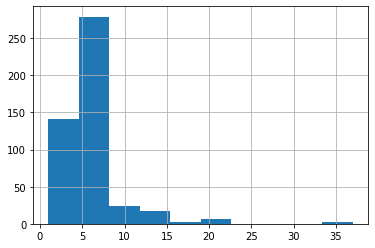

In [30]:
agora_data_goods['reference_id'].value_counts().hist()

In [31]:
X = []
y = []
for index, row in agora_data_goods.iterrows():
    tmp = row['name'] + ' ' + ' '.join(row['props']).replace("\t", " ")
    X.append(tmp)
    y.append(row.reference_id)
X = np.array(X)
y = np.array(y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## токенизация имён

In [33]:
X = []
for index, row in agora_data_goods.iterrows():
    tmp = row['name'] + ' ' + ' '.join(row['props']).replace("\t", " ")
    tmp = tmp.lower().split(" ")
    X.append(set(tmp))

etalons = {}
for index, row in agora_data_prime.iterrows():
    tmp = row['name'] + ' ' + ' '.join(row['props']).replace("\t", " ")
    tmp = tmp.lower().split(" ")
    etalons[agora_data_prime.product_id[index]] = set(tmp)

y = np.array(agora_data_goods.reference_id)
etalons

{'000740b6c1cc763e': {'',
  '(2400x1080)',
  '(irda),',
  '(nano',
  '10s',
  '11',
  '128',
  '179',
  '2',
  '2g,',
  '3g',
  '4',
  '4g',
  '5000',
  '6',
  '6.43"',
  '6/128',
  '60',
  '64',
  '8',
  'amoled',
  'android',
  'bluetooth,',
  'g95',
  'helio',
  'ip53',
  'lte,',
  'mediatek',
  'nfc',
  'note',
  'redmi',
  'ru,',
  'sim)',
  'sim-карты',
  'wi-fi,',
  'xiaomi',
  'аккумулятор',
  'белоснежная',
  'беспроводные',
  'вес',
  'встроенная',
  'г',
  'галька',
  'гб',
  'гц',
  'защиты',
  'интерфейсы',
  'инфракрасный',
  'камеры',
  'ма·ч',
  'мп',
  'мп,',
  'оперативная',
  'операционная',
  'память',
  'порт',
  'связи',
  'система',
  'смартфон',
  'стандарт',
  'степень',
  'экран'},
 '0083737f904dd9a9': {'',
  '1400',
  '350',
  'lu-1058',
  'lumme',
  'вес',
  'вт',
  'г',
  'для',
  'защита',
  'концентратор',
  'мощность',
  'насадки',
  'особенности',
  'от',
  'перегрева,',
  'петля',
  'подвешивания',
  'ручка,',
  'складная',
  'фен'},
 '01378fa92f901df5

Сравниваем слова у товаров и эталонов

In [34]:
ans = []
for i in X:
    max_len = 0
    tmp_ans = 0
    for k, j in etalons.items():
        if (len(i & j) > max_len):
            max_len = len(i & j)
            tmp_ans = k
    ans.append(tmp_ans)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y, np.array(ans))

0.8773381294964029